<a href="https://colab.research.google.com/github/konrado10/NaukaGIT/blob/main/Zad141.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Konwolucyjne sieci neuronowe

###Zad 1

In [2]:
%%bash
rm -rf /content/*

In [3]:
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [4]:
%%bash
pwd
wget --output-document=cats_and_dogs.zip --quiet https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/cats_and_dogs/dogs-vs-cats.zip
ls

/content
cats_and_dogs.zip


In [5]:
%%bash
unzip cats_and_dogs.zip
# rm -rf cats_and_dogs.zip

rm -rf sampleSubmission.csv

unzip -q train.zip -d /content/kaggle_original_data
rm -rf train.zip
cp /content/kaggle_original_data/train/* /content/kaggle_original_data/
rm -rf /content/kaggle_original_data/train
 
unzip -q /content/test1.zip
# rm -rf test1.zip
# rm -rf cats_and_dogs.zip
ls

Archive:  cats_and_dogs.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               
cats_and_dogs.zip
kaggle_original_data
test1
test1.zip


In [6]:
def make_accuracy_plot(history):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(12,12))
    plt.plot(epochs, acc, label = 'Dokładność trenowania', marker = 'o')
    plt.plot(epochs, val_acc, label = 'Dokładność walidacji', marker = 'o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss)+1)

    plt.figure(figsize=(12,12))
    plt.plot(epochs, loss, label = 'Strata trenowania', marker = 'o')
    plt.plot(epochs, val_loss, label = 'Strata walidacji', marker = 'o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

In [7]:
def display_augmented_images(directory, idx):
    
    import os
    from tensorflow.keras.preprocessing import image
    import numpy as np
    import matplotlib.pyplot as plt
    
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(150,150))

    x = image.img_to_array(img)
    x = x.reshape((1,)+ x.shape)

    i = 1
    plt.figure(figsize=(20,14))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3,4,i)
        plt.grid('off')
        plt.axis('off')
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break


In [8]:
# ścieżka do oryginalnego zbioru
original_dataset_dir = '/content/kaggle_original_data'
# katalog, w którym umieścimy nasze dane
base_dir = '/content/cats_and_dogs'

if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')    # katalog zbioru treningowego
valid_dir = os.path.join(base_dir, 'valid')    # katalog zbioru walidacyjnego
test_dir = os.path.join(base_dir, 'test')      # katalog zbioru testowego

for directory in (train_dir, valid_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)
    
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

dirs = [train_cats_dir, train_dogs_dir, valid_cats_dir, valid_dogs_dir, test_cats_dir, test_dogs_dir]

for directory in dirs:
    if not os.path.exists(directory):
        os.mkdir(directory)

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
len(os.listdir(train_cats_dir))

1000

### Zad 2

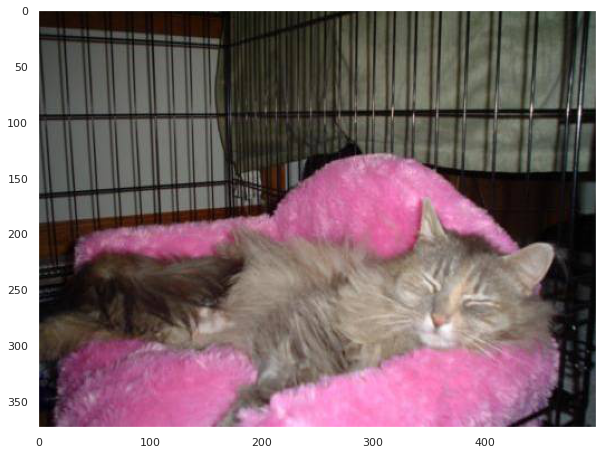

In [11]:
from keras.preprocessing import image

index = 120 #@param {type: 'slider', min: 0, max:999}
img_path = '/content/cats_and_dogs/train/cats/cat.'+str(index)+'.jpg'

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)

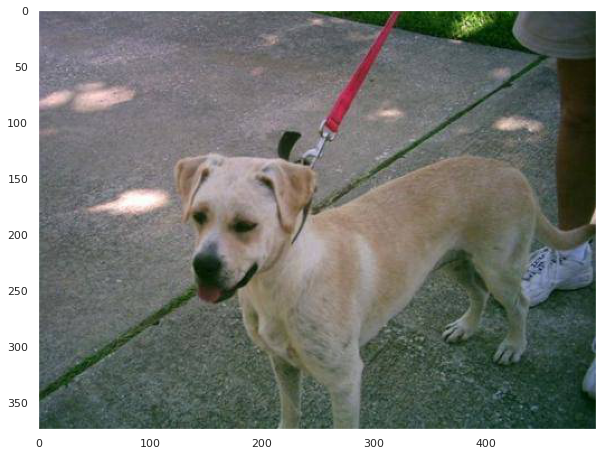

In [12]:
from keras.preprocessing import image

index = 44 #@param {type: 'slider', min: 0, max:999}
img_path = '/content/cats_and_dogs/train/dogs/dog.'+str(index)+'.jpg'

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)

In [13]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Zad 3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory = valid_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [ ]:
import time
tic = time.time()
history = model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=30, validation_data=valid_generator, validation_steps=50)

toc = time.time()
print(f'Czas przetwarzania: {toc-tic}s')
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 107s 1s/step - loss: 0.6945 - accuracy: 0.5238 - val_loss: 0.6807 - val_accuracy: 0.5230
Epoch 2/30
100/100 [==============================] - 105s 1s/step - loss: 0.6543 - accuracy: 0.6170 - val_loss: 0.6349 - val_accuracy: 0.6400
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.6007 - accuracy: 0.6799 - val_loss: 0.6712 - val_accuracy: 0.5940
Epoch 4/30
100/100 [==============================] - 107s 1s/step - loss: 0.5641 - accuracy: 0.7072 - val_loss: 0.6208 - val_accuracy: 0.6640
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5273 - accuracy: 0.7405 - val_loss: 0.5978 - val_accuracy: 0.6700
Epoch 6/30
100/100 [==============================] - 106s 1s/step - loss: 0.5185 - accuracy: 0.7273 - val_loss: 0.5776 - val_accuracy: 0.7040
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.4600 - accuracy: 0.7917 - val_loss: 0.5848 - val_accuracy: 0.7000

### Zad 4

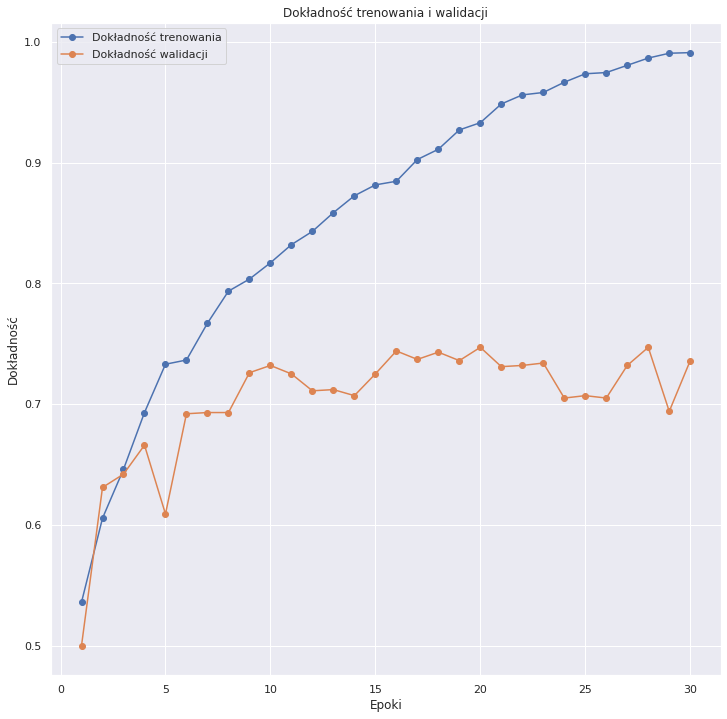

In [ ]:
make_accuracy_plot(history)

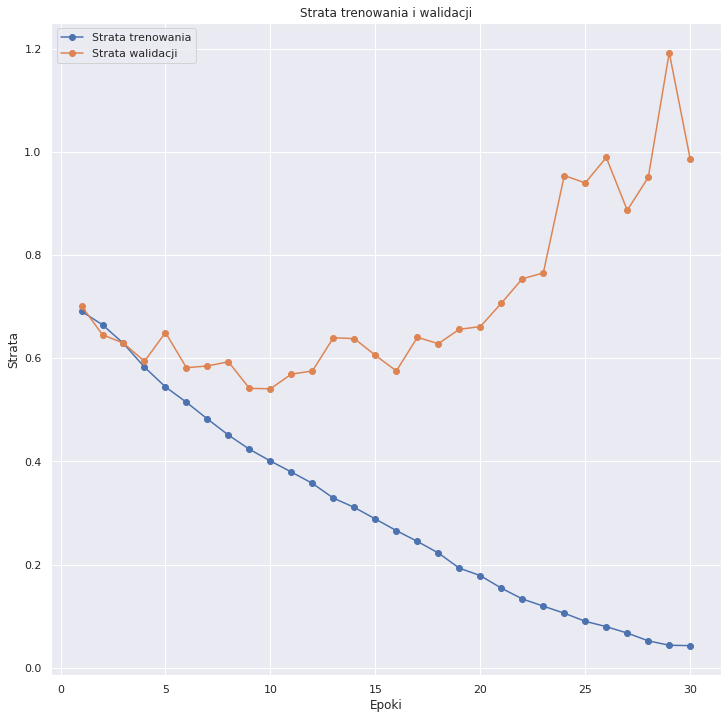

In [ ]:
make_loss_plot(history)

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,     # zakres kąta o który losowo zostanie wykonany obrót obrazów
                            width_shift_range=0.2,  # pionowe przekształcenia obrazu
                            height_shift_range=0.2, # poziome przekształcenia obrazu
                            shear_range=0.2,        # zares losowego przycianania obrazu
                            zoom_range=0.2,         # zakres losowego przybliżania obrazu
                            horizontal_flip=True,   # losowe odbicie połowy obrazu w płaszczyźnie poziomej
                            fill_mode='nearest')    # strategia wypełniania nowo utworzonych pikseli, któe mogą powstać w wyniku przekształceń

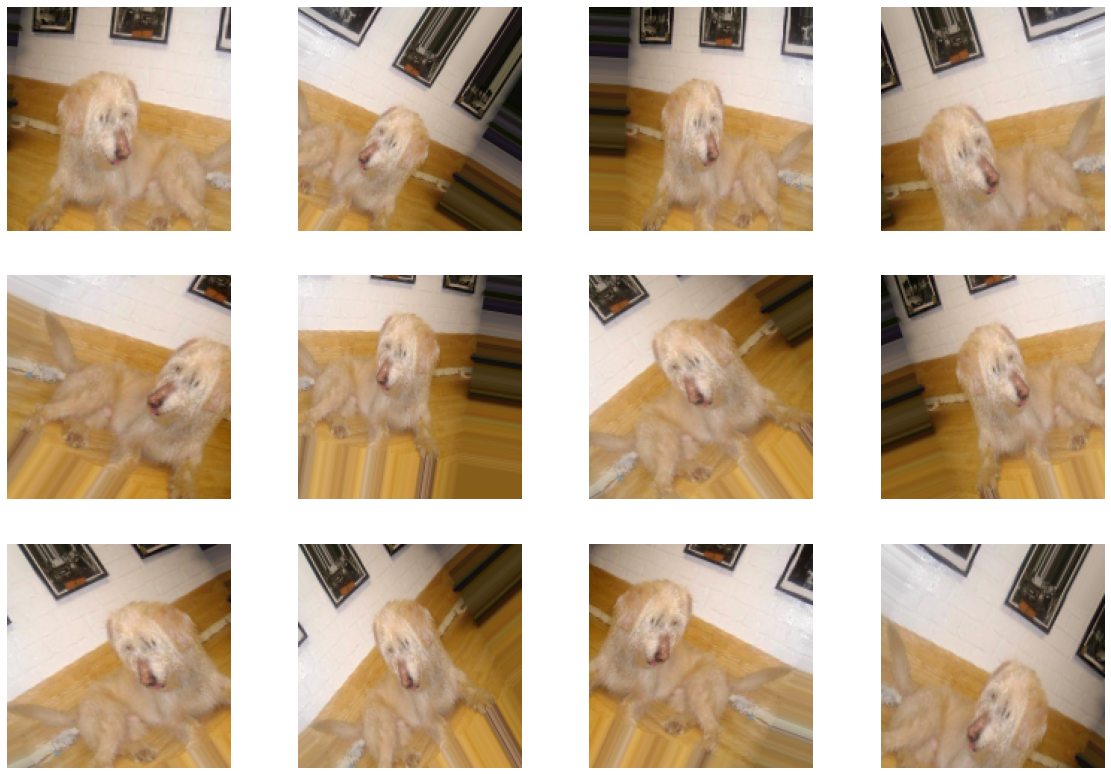

In [ ]:
#@title Wybierz index obrazka w celu jego eksploracji
from keras.preprocessing import image

index = 323 #@param {type: 'slider', min:0, max:999}
display_augmented_images(train_dogs_dir, index)

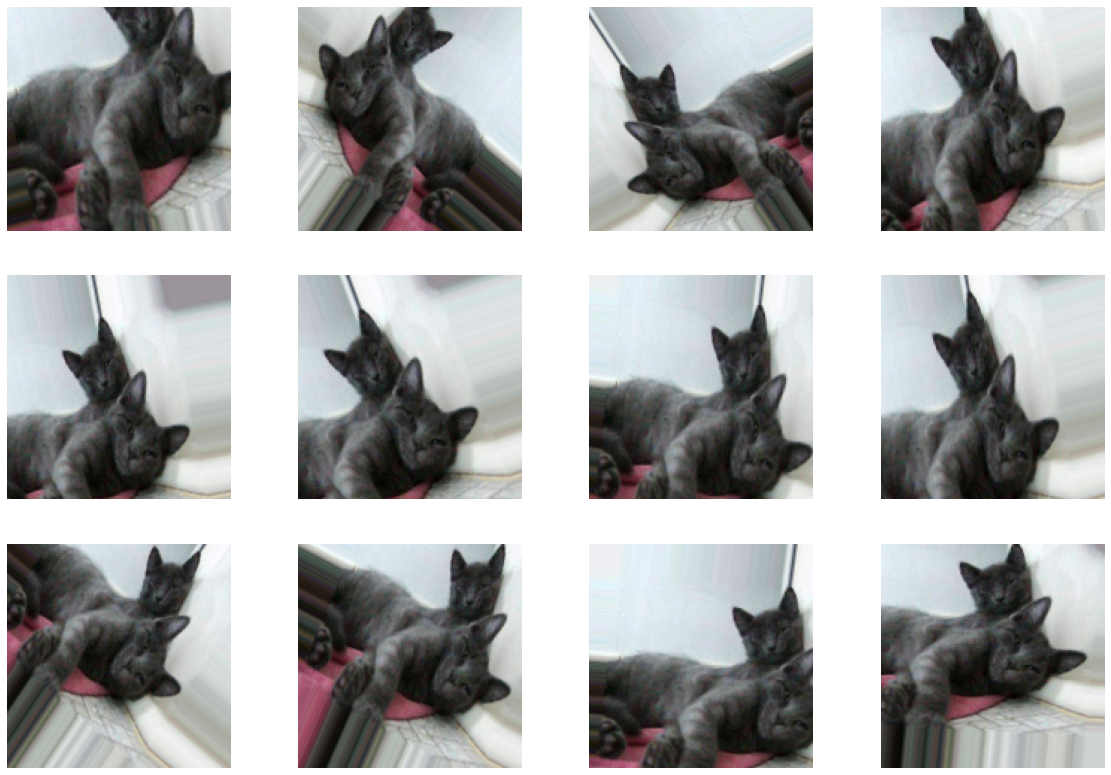

In [ ]:
#@title Wybierz index obrazka w celu jego eksploracji
from keras.preprocessing import image

index = 592 #@param {type: 'slider', min:0, max:999}
display_augmented_images(train_cats_dir, index)

### Zad 5

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

# nie modyfikujemy danych walidacyjnych!!!
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=50,
                             epochs=30,    # 100
                             validation_data=valid_generator,
                             validation_steps=50)

Epoch 1/30
50/50 [==============================] - 15s 274ms/step - loss: 0.7972 - accuracy: 0.5050 - val_loss: 0.6917 - val_accuracy: 0.5010
Epoch 2/30
50/50 [==============================] - 11s 219ms/step - loss: 0.6957 - accuracy: 0.5046
Epoch 3/30
50/50 [==============================] - 11s 219ms/step - loss: 0.6906 - accuracy: 0.5349
Epoch 4/30
50/50 [==============================] - 11s 221ms/step - loss: 0.6765 - accuracy: 0.5678
Epoch 5/30
50/50 [==============================] - 11s 221ms/step - loss: 0.6792 - accuracy: 0.5656
Epoch 6/30
50/50 [==============================] - 11s 221ms/step - loss: 0.6681 - accuracy: 0.6037
Epoch 7/30
50/50 [==============================] - 11s 217ms/step - loss: 0.6471 - accuracy: 0.6157
Epoch 8/30
50/50 [==============================] - 11s 217ms/step - loss: 0.6347 - accuracy: 0.6518
Epoch 9/30
50/50 [==============================] - 11s 218ms/step - loss: 0.6354 - accuracy: 0.6170
Epoch 10/30
50/50 [==============================

### Zad 6

In [32]:
model.save('cats_and_dogs_small_2.h5')

ValueError: ignored

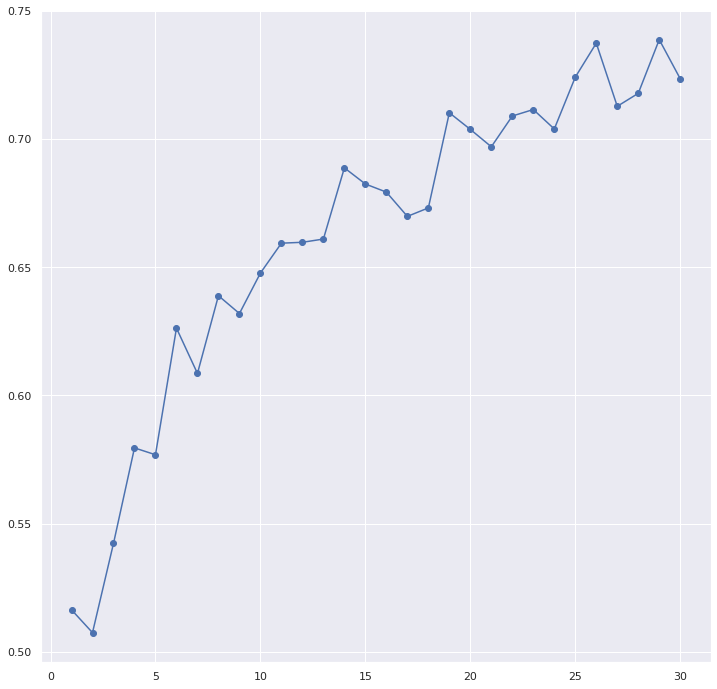

In [33]:
make_accuracy_plot(history)

In [ ]:
make_loss_plot(history)

### Zad 7

In [16]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [18]:
len(model.trainable_weights)

30

In [19]:
conv_base.trainable = False
len(model.trainable_weights)

4

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

# nie modyfikujemy danych walidacyjnych!!!
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=50,
                              validation_data = valid_generator,
                              validation_steps=50,
                              verbose=2)

Epoch 1/50
100/100 - 26s - loss: 0.5960 - accuracy: 0.6925 - val_loss: 0.4460 - val_accuracy: 0.8360
Epoch 2/50
100/100 - 18s - loss: 0.4771 - accuracy: 0.7885 - val_loss: 0.3663 - val_accuracy: 0.8540
Epoch 3/50
100/100 - 18s - loss: 0.4256 - accuracy: 0.8135 - val_loss: 0.3387 - val_accuracy: 0.8440
Epoch 4/50
100/100 - 18s - loss: 0.4073 - accuracy: 0.8150 - val_loss: 0.3097 - val_accuracy: 0.8700
Epoch 5/50
100/100 - 18s - loss: 0.3835 - accuracy: 0.8355 - val_loss: 0.2897 - val_accuracy: 0.8900
Epoch 6/50
100/100 - 18s - loss: 0.3805 - accuracy: 0.8335 - val_loss: 0.2970 - val_accuracy: 0.8670
Epoch 7/50
100/100 - 18s - loss: 0.3615 - accuracy: 0.8460 - val_loss: 0.2753 - val_accuracy: 0.8870
Epoch 8/50
100/100 - 18s - loss: 0.3530 - accuracy: 0.8325 - val_loss: 0.2704 - val_accuracy: 0.8910
Epoch 9/50
100/100 - 18s - loss: 0.3404 - accuracy: 0.8580 - val_loss: 0.2605 - val_accuracy: 0.9010
Epoch 10/50
100/100 - 18s - loss: 0.3346 - accuracy: 0.8505 - val_loss: 0.2880 - val_accura

### Zad 8

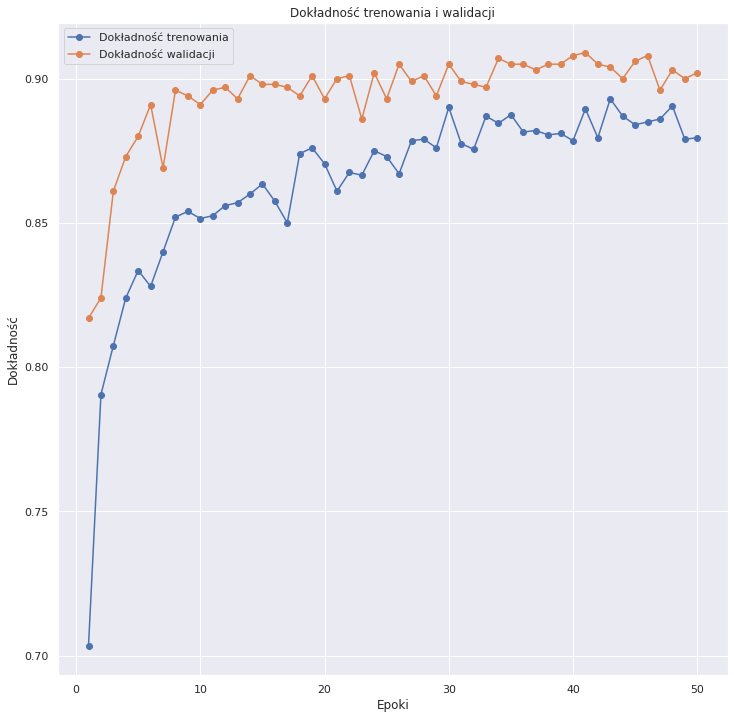

In [ ]:
make_accuracy_plot(history)

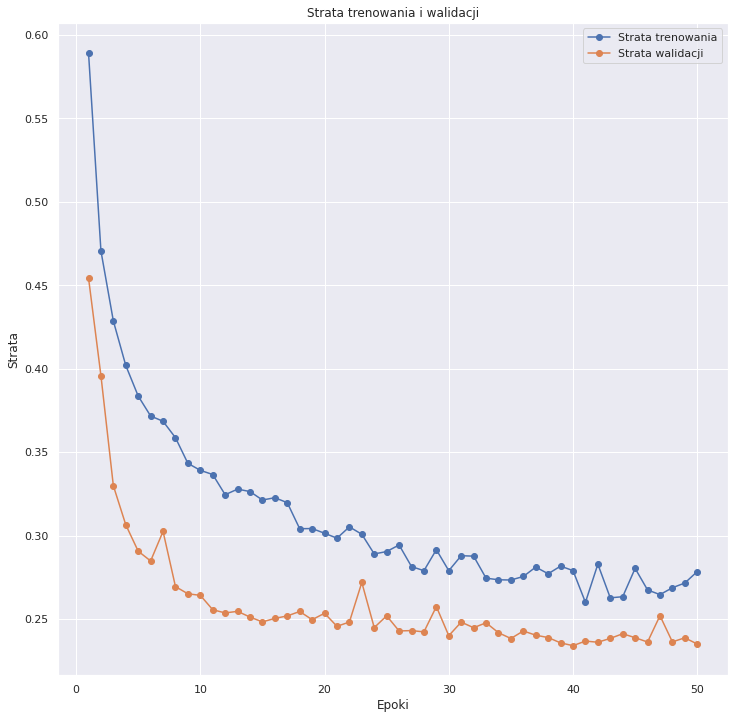

In [ ]:
make_loss_plot(history)

### Zad 9

In [34]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [35]:
#@title Wybierz indeks zdjęcia

index = 1522 #@param {type: 'slider', min:0, max:1999}
img_path = '/content/cats_and_dogs/test/cats/cat.'+str(index)+'.jpg'

from keras.preprocessing import image
import numpy as np

#przetworzenie obrazu tak aby uzskał formę czterowymiarowego tensora
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor/255

print(img_tensor.shape)

(1, 150, 150, 3)


(-0.5, 149.5, 149.5, -0.5)

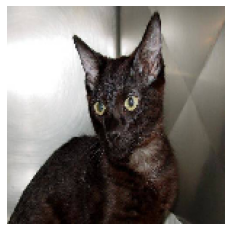

In [36]:
plt.imshow(img_tensor[0])
plt.grid('off')
plt.axis(False)

Wyodrębnienie map cech

In [37]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

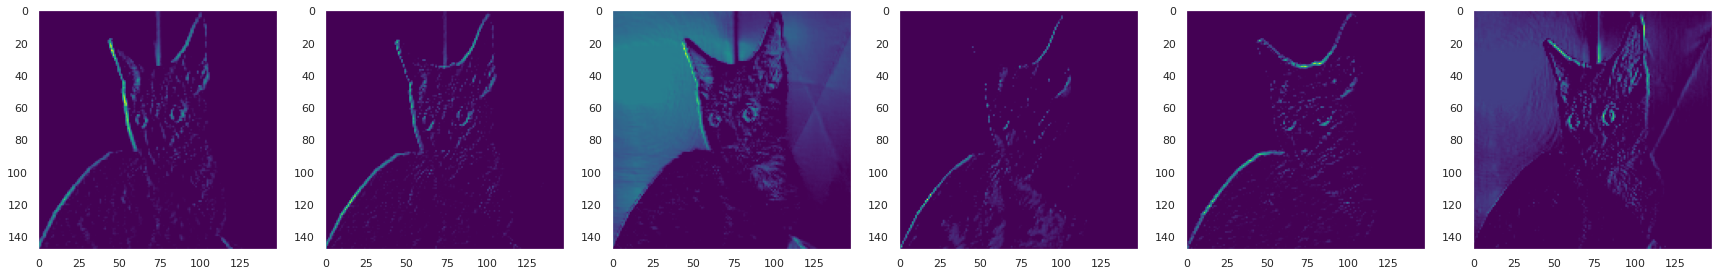

In [38]:
plt.figure(figsize=(30,30))

for i in range(1,7):
    plt.subplot(1,6,i)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.grid(False)

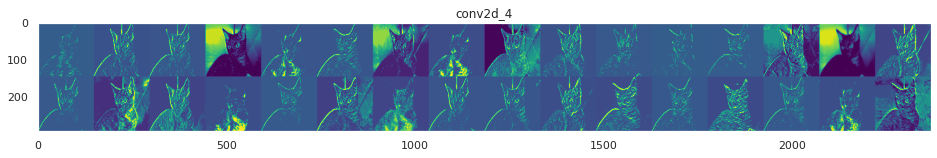

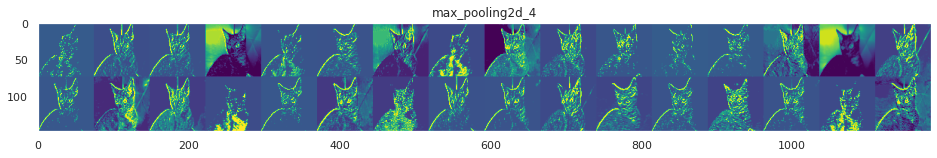

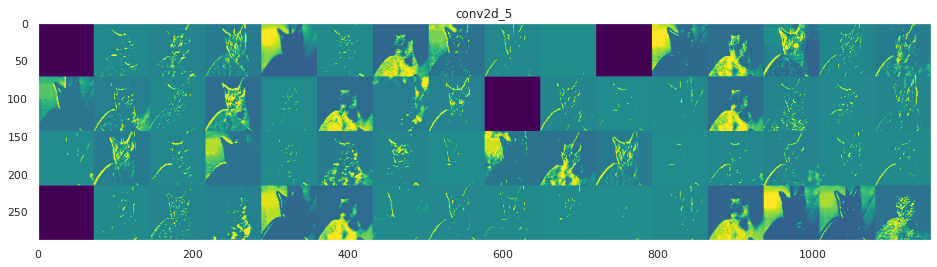

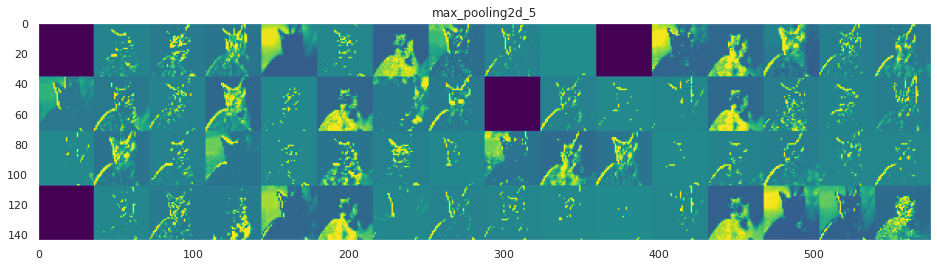

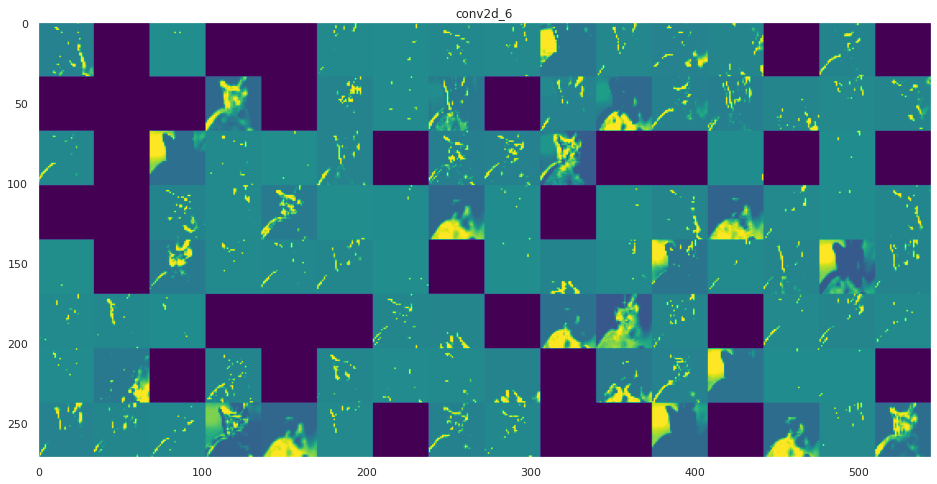

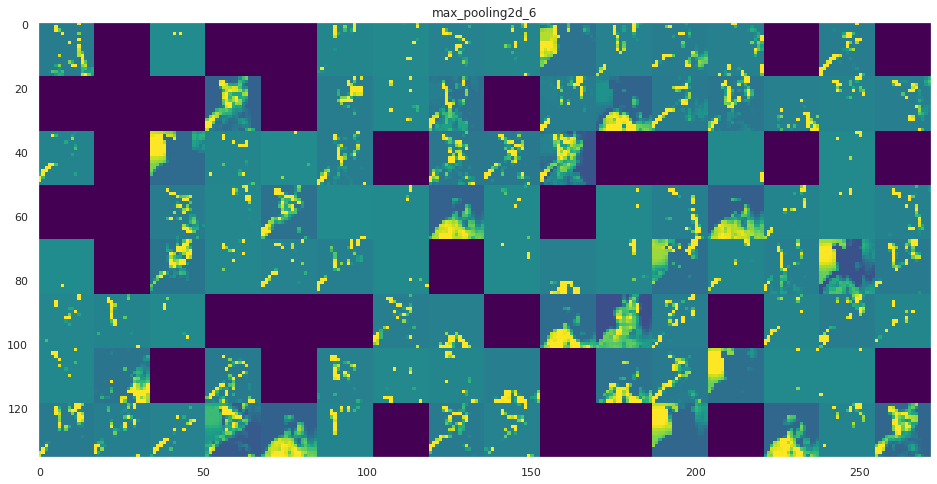

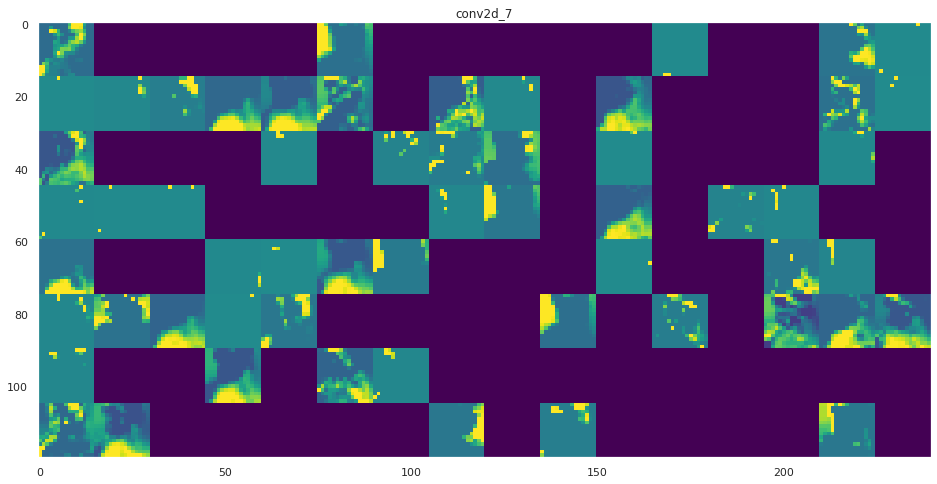

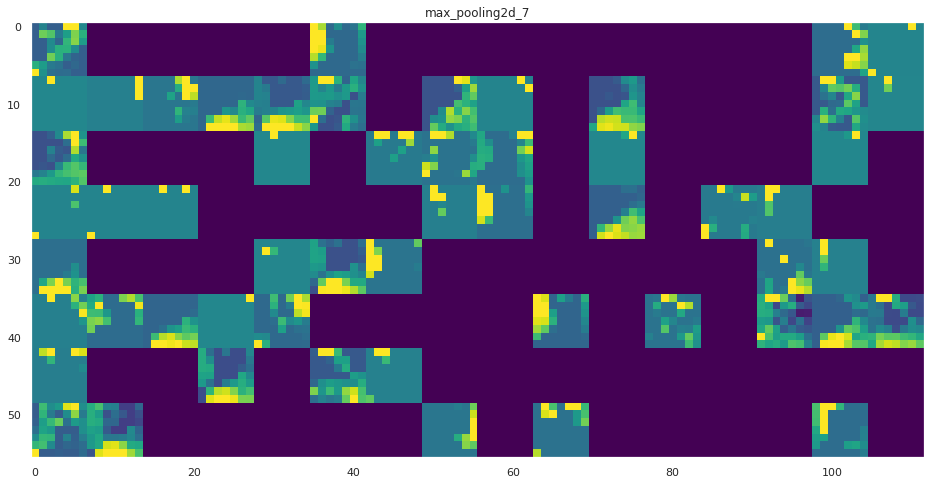

In [39]:
layer_names = [layer.name for layer in model.layers[:8]]

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size: (col + 1) * size, row * size: (row+ + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Zad 10

In [51]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
             include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.GradientTape(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

iterate = K.function([model.input], [loss,grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150 , 3))])

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.

for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    
    input_img_data += grads_value * step
    
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

AttributeError: ignored

In [49]:
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     